## Clustering

In [1]:
#There is no target, there is only data, we don't divide th data into x,y

In [2]:
import pandas as pd

In [3]:
df=pd.read_excel('cars.xls')

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
with pd.ExcelWriter("arabadeneme.xlsx") as writer:
    df.to_excel(writer, sheet_name="Sheet1")  
    df.to_excel(writer, sheet_name="Sheet2")

In [6]:
from sklearn.cluster import KMeans
from sklearn .metrics import silhouette_score 

In [7]:
import matplotlib.pyplot as plt

In [8]:
x =df[['Price','Mileage','Cylinder']]

In [9]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [10]:
model=KMeans(n_clusters=4) #divided into 4 groups

In [11]:
model=model.fit(x)

In [12]:
predict=model.predict(x)

In [13]:
predict

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

In [14]:
x['cluster'] =predict

/var/folders/rn/b5vft9xd51l44scchc5xvckh0000gn/T/ipykernel_20712/2592708217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster'] =predict


In [15]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,1


In [16]:
silhouette_score(x,predict)  
#we will decide how similar


0.4132860967758472

In [17]:
#Elbow Method:Wherever the elbow starts to break, you have to divide 
#it into as many groups.
#let's see if we did it right

In [18]:
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters=no_of_cluster)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        print ("Number of cluster{}, silhoette{}".format(no_of_cluster,score))

In [19]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1,
       1, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


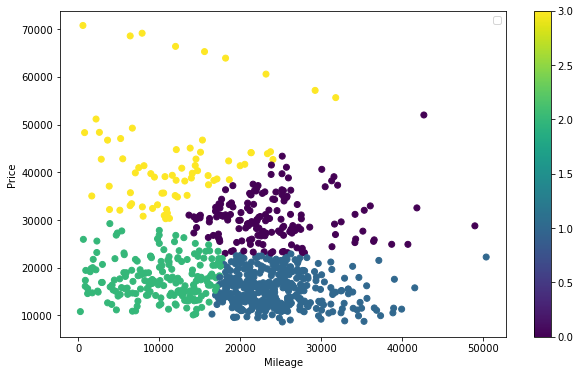

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=predict)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


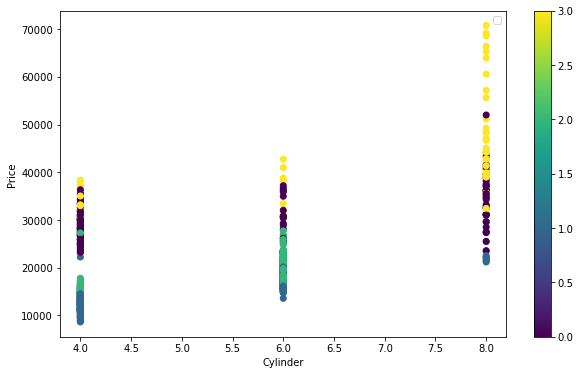

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(x.Cylinder,x.Price,c=predict)
plt.xlabel("Cylinder")
plt.ylabel("Price")
plt.legend()
plt.colorbar()
plt.show()

In [22]:
##Elbow Method: whenever the silhouette starts falling, from there
# makes sense to group

In [23]:
import numpy as np

In [24]:
# Predicticting the silhouette score for each clusters 
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters): 
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

Number of cluster 2,silhouette0.45114541749476456
Number of cluster 3,silhouette0.4126449670431248
Number of cluster 4,silhouette0.4132860967758472
Number of cluster 5,silhouette0.35477474070654486
Number of cluster 6,silhouette0.3635484603350622
Number of cluster 7,silhouette0.36210176919172843
Number of cluster 8,silhouette0.3666729420609729
Number of cluster 9,silhouette0.3485914189734944


In [25]:
#It decreased in line 5 and increased after that, and since it started from 2
#actually we say th 4th,so we wrote 4. Because for grouping there must be at least 2 groups

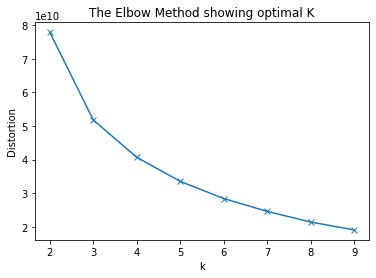

In [26]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show() 

In [27]:
x

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,1
...,...,...,...,...
799,16507.070267,16229,6,2
800,16175.957604,19095,6,1
801,15731.132897,20484,6,1
802,15118.893228,25979,6,1


In [28]:
d={0:"Cheap and few miles",1:"Cheap and many miles",2:"Expensive and few miles",3:"Medium"}
x["name"]=x["cluster"].map(d)

/var/folders/rn/b5vft9xd51l44scchc5xvckh0000gn/T/ipykernel_20712/4202257912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["name"]=x["cluster"].map(d)
